## find nearest cluster to target

In [39]:
t = cr.Target(gaiaDR2id=5576476552334683520, verbose=False)
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

In [40]:
#3d coordinates
t.target_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (102.65804253, -37.96023412, 223.73943744)>

In [41]:
nearest_cluster_member = t.find_nearest_cluster_member(match_id=False)

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



In [42]:
#nearest star in a cluster
t.nearest_cluster_member

source_id                                           45743570662353024
clusters                                                   Melotte 25
reference                                                    Dias2014
ext_catalog_name                                           533-008368
ra                                                            64.0857
dec                                                           16.5097
pmra                                                              NaN
pmdec                                                             NaN
parallax                                                          NaN
phot_g_mean_mag                                               14.4887
phot_bp_mean_mag                                               15.076
phot_rp_mean_mag                                              13.4803
k13_name_match                                             Melotte_25
Cluster                                                    Melotte_25
how_match           

In [43]:
#nearest cluster
t.nearest_cluster_members

,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
346,45645301810449664,Melotte 25,Dias2014,532-007927,63.928767,16.290613,5.133255,2.013622,0.994975,14.176143,14.834952,13.389873,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1005.050634
347,45645679767571072,Melotte 25,Dias2014,532-007929,63.944675,16.308163,1.552334,1.755407,0.522951,15.875837,16.474293,15.127310,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1912.226749
348,45645989005215616,Melotte 25,Dias2014,532-007926,63.925646,16.330320,6.919474,-4.316495,1.089684,16.752245,17.581797,15.849460,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,917.697202
352,45740272127474304,Melotte 25,Dias2014,532-007939,64.037664,16.393466,-0.228894,-3.205864,0.383354,16.566547,17.332075,15.682869,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,2608.557645
353,45740547005380992,Melotte 25,Dias2014,533-008356,64.021685,16.408766,2.704390,-1.312295,0.901625,16.284498,17.010864,15.445896,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1109.108599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513900,3314527352969805312,"Melotte 25,Melotte 25","Dias2014,Dias2014","543-009628,543-009629",67.267659,18.424263,7.569343,-5.699585,0.755857,16.061941,16.967373,15.081229,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1323.001655
513902,3314528310746224128,Melotte 25,Dias2014,543-009637,67.309520,18.499896,-1.065479,-3.577588,0.685797,16.952353,17.924576,15.945135,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,1458.158441
513903,3314529895590433280,Melotte 25,Dias2014,543-009643,67.360022,18.533393,2.877971,-11.134698,1.213020,14.206573,15.191239,13.213704,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,824.388454
513904,3314530101748860928,Melotte 25,Dias2014,543-009647,67.404217,18.541789,5.351107,-9.572095,2.176240,15.193776,16.335903,14.124325,Melotte_25,Melotte_25,K13_index_table_string_match,False,"K13index: possibly this is a cluster, but para...",NaN,NaN,459.508093


In [44]:
t.nearest_cluster_name

'Melotte_25'

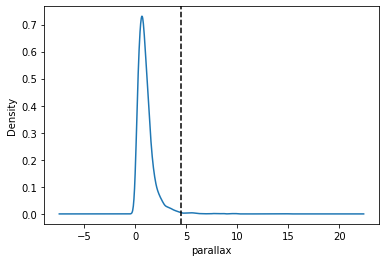

In [45]:
#plot parallax distribution of cluster members 
fig = t.nearest_cluster_members.parallax.plot.kde()
fig.axes.set_xlabel('parallax')
fig.axes.axvline(t.gaia_params.parallax, 0, 1, c='k', ls='--')

## plotting

### Color-Magnitude diagram

In [46]:
t = cr.Target(gaiaDR2id=5251470948229949568, verbose=False)
df_gaia = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

In [47]:
t.find_nearest_cluster_member()

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
704039,5251470948229949568,"IC2602,IC_2602,IC_2602","GaiaCollaboration2018_tab1a,CantatGaudin_2018,...","5251470948229949568,5251470948229949568,786691642",157.037281,-64.505211,-18.016542,11.306775,6.989271,10.355962,10.695068,9.887476,IC_2602,IC_2602,string_match,False,NaN,8.345,NaN,143.076438


In [48]:
c = cr.Cluster(cluster_name='IC_2602')
df_gaia_mem = c.query_cluster_members_gaia_params()
df_gaia_mem.shape

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf

Loaded: /home/jp/github/research/project/chronos/chronos/../data/IC_2602_members.hdf5


(707, 95)

Text(0.5, 1.0, 'IC_2602')

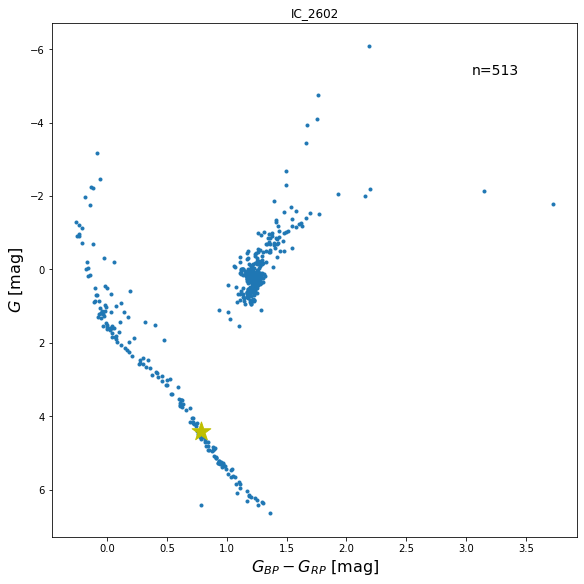

In [49]:
#CMD diagram
ax = cr.plot_cmd(df=df_gaia_mem, target_gaia_id=t.gaiaid);
ax.set_title(t.nearest_cluster_name)

In [50]:
cc = cr.ClusterCatalog(verbose=False)
df = cc.query_catalog(name='Bossini2019')
idx = df.Cluster.isin([t.nearest_cluster_name])
d = df[idx]

In [51]:
d

,Cluster,ra,dec,log10_age,e_logA,E_logA,dist_mod,dist_mod_e1,dist_mod_e2,AV,...,E_AV,AGTO,e_AGTO,E_AGTO,Fe/H,r_Fe/H,SimbadName,_RA.icrs,_DE.icrs,distance
2,IC_2602,160.613,-64.426,7.547,7.563,7.533,5.914,5.914,5.914,0.096,...,0.096,0.094,0.094,0.094,0.0,HRS,IC2602,160.613,-64.426,152.335106


### kinematics

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



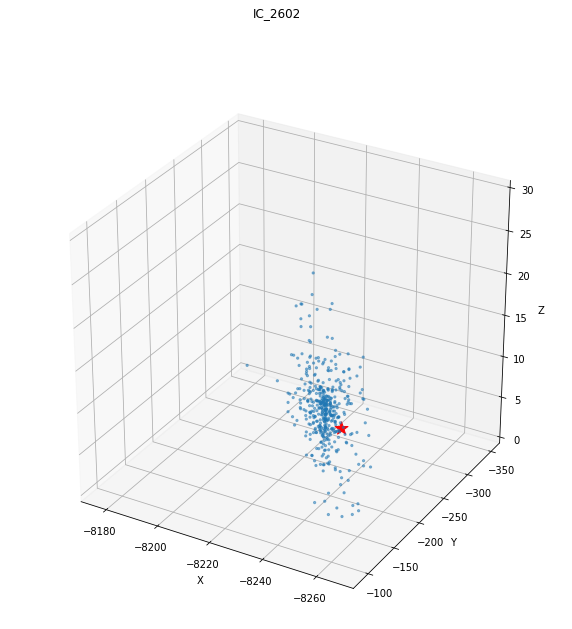

In [52]:
t = cr.Target(gaiaDR2id=5251470948229949568, verbose=False)
df_gaia_target = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
df_gaia_nearest_star = t.find_nearest_cluster_member()

fig = cr.plot.plot_xyz_3d(t.nearest_cluster_members, target_gaiaid=t.gaiaid, zlim=(0,100));
fig.suptitle(t.nearest_cluster_name);

Bouma2019 catalog do not have radial_velocity so we need to query gaia catalog for each members.

In [53]:
c = cr.Cluster(catalog_name='CantatGaudin2018', 
            cluster_name='IC_2602', 
            verbose=False)

#query radial_velocity for each star from gaia dr2 catalog
#trim faint cluster members with Gmag cut, but still include the target 
df_gaia_mem = c.query_cluster_members_gaia_params(gmag_cut=14, clobber=False)
df_gaia_mem.shape

(707, 95)

Text(0.5, 0.98, 'IC_2602')

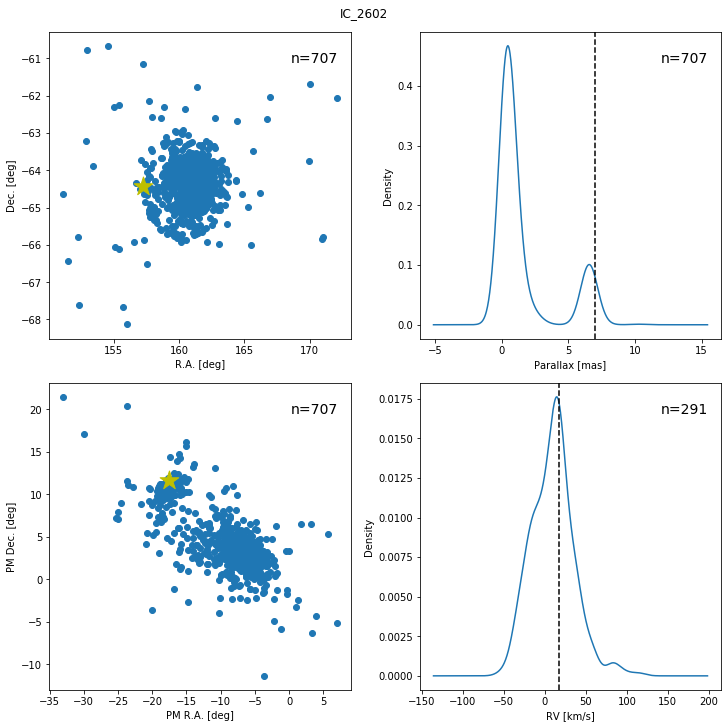

In [54]:
fig = cr.plot_rdp_pmrv(df=df_gaia_mem, target_gaia_id=t.gaiaid);
fig.suptitle(t.nearest_cluster_name)

### kinematics (galactocentric frame)

Text(0.5, 0.98, 'IC_2602')

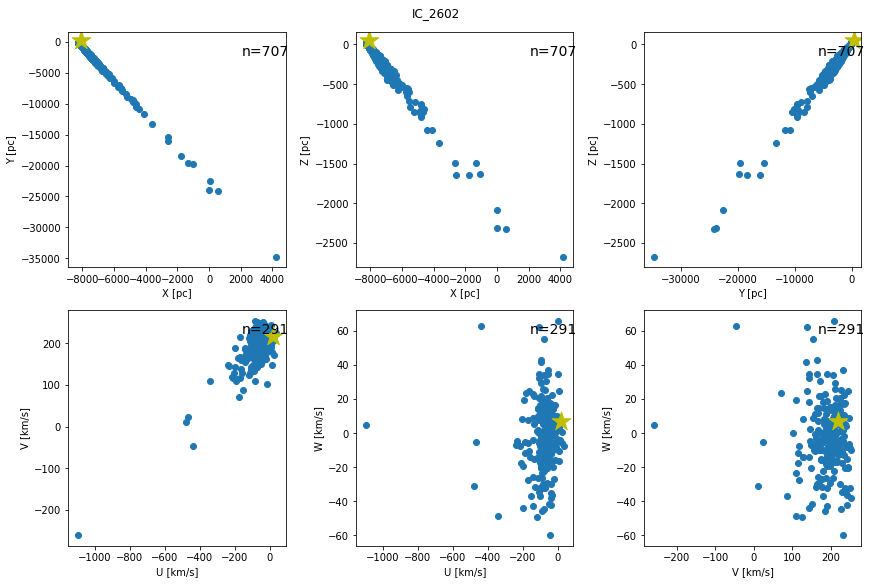

In [55]:
fig = cr.plot_xyz_uvw(df=df_gaia_mem, target_gaia_id=t.gaiaid);
fig.suptitle(t.nearest_cluster_name)

## get gaia params for each TOI

In [56]:
toi_gaia_params = cr.query_gaia_params_of_all_tois(verbose=True, clobber=False, update=True)

Loaded: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv
Querying Gaia DR2 catalog for new TOIs



100%|██████████| 1283/1283 [00:00<00:00, 1718713.52it/s]


Saved: /home/jp/github/research/project/chronos/chronos/../data/toi_gaia_params.hdf5


In [57]:
toi_gaia_params.tail()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
TOI,,,,,,,,,,,,,,,,,,,,,
1693.01,1635721458409799680,Gaia DR2 3451908921382409472,3451908921382409472,210991833,2015.5,90.3083,0.040521,34.7731,0.0366799,32.4443,...,0.0949,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000603415
1694.01,1635721458409799680,Gaia DR2 1104269596843209472,1104269596843209472,388701980,2015.5,97.7487,0.0191917,66.3606,0.0259455,7.99182,...,0.006,0.1423,200111,0.84231,0.817082,0.868712,0.388104,0.385382,0.390826,8.43561e-05
1695.01,1635721458409799680,Gaia DR2 534988616816537728,534988616816537728,1075474848,2015.5,21.9217,0.0278637,72.2966,0.0362306,22.1289,...,0.123,0.498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000286289
1696.01,1635721458409799680,Gaia DR2 270260649602149760,270260649602149760,1131674501,2015.5,65.2806,0.0675194,48.8198,0.0433563,15.3761,...,0.193,0.4028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000738049
1697.01,1635721458409799680,Gaia DR2 2239890595225449216,2239890595225449216,497152216,2015.5,290.109,0.0210924,61.0854,0.0240031,11.9122,...,0.2473,0.529,200111,0.65087,0.562401,0.702638,0.122829,0.122418,0.123239,0.000428115


## get nearest cluster for each TOI

See scripts and also known_cluster_host_stars.ipynb.

## Interactive plot

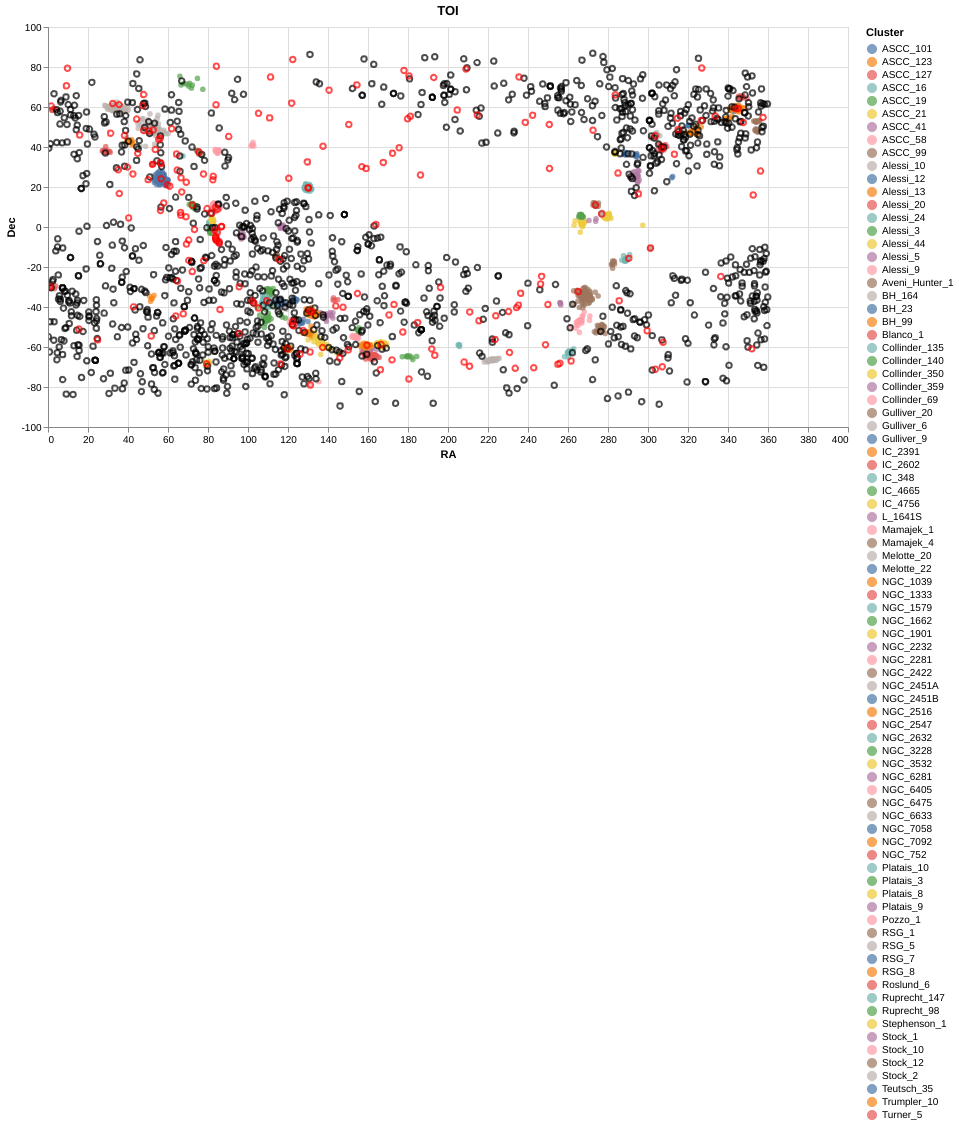

In [67]:
import altair as alt
alt.renderers.enable('notebook')

cr.plot_interactive()

## everest lightcurves

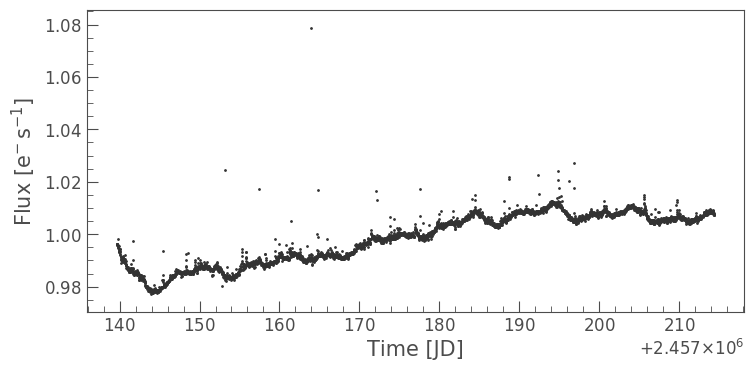

In [68]:
%matplotlib inline
import chronos as cr

eve = cr.Everest(epicid=211314705, campaign=5, verbose=False)
eve.lc.scatter()

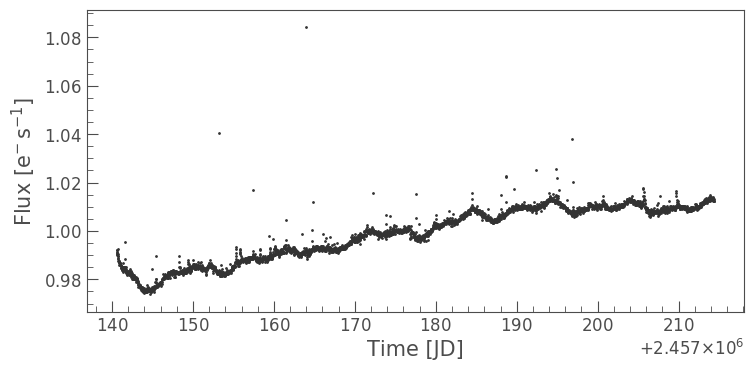

In [69]:
k2sff = cr.K2SFF(epicid=211314705, campaign=5, verbose=False)
k2sff.lc.scatter()

## isochrone fitting

## Clustering algorithms
* [DBSCAN](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py)
* [affinity Propagation](https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html#sphx-glr-auto-examples-cluster-plot-affinity-propagation-py)

In [70]:
c = cr.Cluster(catalog_name='Bouma2019', 
             cluster_name='IC_2602', 
             verbose=False)
df = c.query_cluster_members()

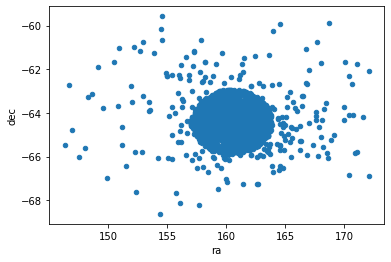

In [71]:
from sklearn.cluster import AffinityPropagation
df.plot.scatter(x='ra',y='dec')

In [72]:
X = df[['ra','dec','parallax']].values

## Speed benchmarking

In [ ]:
t = cr.Target(toiid=837, verbose=False)

In [ ]:
c = cr.Cluster(cluster_name='IC_2602', verbose=False)
df_mem = c.query_cluster_members()